# Working with time series, frequency series, and unit conversion

In this notebook, we show some of the most useful features of the [timeseries](../series.rst) module. To do so, we will analyze a fake gravitational-wave signal. We will also show the [frequencyseries](../series.rst) module and the [unitconv](../unitconv.rst) modules.

First, let's generate this signal. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit import timeseries as ts
from kuibit import series
from kuibit import unitconv as uc
from kuibit.gw_utils import luminosity_distance_to_redshift

%matplotlib inline

In [2]:
t = np.linspace(0, 20, 5000)
y = np.sin(t)

# Generate a TimeSeries by providing the times and the values of the series
gw = ts.TimeSeries(t, y)

To access the times and the values, use ``gw.t`` and ``gw.y``. You can also iterate over the series with a for loop yielding the elements `(t, y)` at each iteration of the loop. For example.

In [3]:
for tt, yy in gw:
    print(tt, yy)

0.0 0.0
0.004000800160032006 0.004000789486971321
0.008001600320064013 0.008001514935783532
0.012002400480096018 0.012002112309302542
0.016003200640128026 0.016002517572444287
0.020004000800160033 0.020002666693199687
0.024004800960192037 0.024002495643659576
0.028005601120224044 0.028001940401039562
0.03200640128025605 0.03200093694870479
0.03600720144028806 0.03599942127719461
0.040008001600320066 0.03999732938524717
0.04400880176035207 0.0439945972808238
0.048009601920384073 0.04799116098213332
0.05201040208041608 0.05198695651865616
0.05601120224044809 0.055981919932168285
0.060012002400480095 0.059975987277764924
0.0640128025605121 0.06396909462488413
0.0680136027205441 0.06796117805833003
0.07201440288057612 0.07195217367929596
0.07601520304060812 0.07594201760638712
0.08001600320064013 0.07993064597664322
0.08401680336067213 0.08391799494656059
0.08801760352070415 0.08790400069311417
0.09201840368073615 0.09188859941477902
0.09601920384076815 0.09587172733255157
0.10002000400080

 -0.9964260536299084
4.800960192038407 -0.9960801338051988
4.804960992198439 -0.995718270342789
4.808961792358471 -0.9953404690348036
4.812962592518503 -0.9949467359284738
4.816963392678535 -0.9945370773260419
4.820964192838567 -0.9941114997846592
4.824964992998599 -0.9936700101162819
4.828965793158631 -0.9932126153875613
4.832966593318663 -0.992739322919732
4.836967393478695 -0.9922501402884931
4.840968193638727 -0.991745075323888
4.8449689937987594 -0.9912241361101787
4.8489697939587915 -0.9906873309857165
4.8529705941188235 -0.9901346685428085
4.8569713942788555 -0.9895661576275803
4.8609721944388875 -0.9889818073398338
4.8649729945989195 -0.9883816270329019
4.8689737947589515 -0.9877656263134994
4.8729745949189835 -0.9871338150415679
4.876975395079016 -0.9864862033301193
4.880976195239048 -0.9858228015450731
4.88497699539908 -0.9851436203050905
4.888977795559112 -0.9844486704814052
4.892978595719144 -0.9837379631976484
4.896979395879176 -0.9830115098296713
4.900980196039208 -0.9822

 -0.25820064394246206
9.689937987597519 -0.26206370548707925
9.693938787757551 -0.2659225723402928
9.697939587917583 -0.26977718273561135
9.701940388077615 -0.2736274749746739
9.705941188237647 -0.27747338742823746
9.709941988397679 -0.28131485853716387
9.713942788557711 -0.28515182681340445
9.717943588717743 -0.28898423084098485
9.721944388877775 -0.2928120092769876
9.725945189037807 -0.29663510085253436
9.729945989197839 -0.3004534443737664
9.733946789357871 -0.30426697872282427
9.737947589517903 -0.3080756428588257
9.741948389677935 -0.3118793758188432
9.745949189837967 -0.31567811671887935
9.749949989997999 -0.31947180475484166
9.753950790158031 -0.32326037920351564
9.757951590318063 -0.32704377942353685
9.761952390478095 -0.33082194485636146
9.765953190638127 -0.3345948150272358
9.76995399079816 -0.3383623295461641
9.773954790958191 -0.342124428108875
9.777955591118223 -0.3458810504977873
9.781956391278255 -0.34963213658297326
9.785957191438287 -0.3533776263231216
9.78995799159832

14.346869373874775 0.9780929022679701
14.350870174034807 0.977252234615262
14.354870974194839 0.9763959246913737
14.35887177435487 0.9755239862027277
14.362872574514903 0.9746364331059032
14.366873374674935 0.973733279607413
14.370874174834967 0.9728145401634756
14.374874974994999 0.9718802294797841
14.37887577515503 0.9709303625112711
14.382876575315063 0.9699649544618686
14.386877375475095 0.9689840207842654
14.390878175635127 0.967987577179659
14.394878975795159 0.9669756395975052
14.39887977595519 0.965948224235262
14.402880576115223 0.9649053475381306
14.406881376275255 0.9638470261987925
14.410882176435287 0.9627732771571416
14.414882976595319 0.9616841176000137
14.41888377675535 0.9605795649609115
14.422884576915383 0.9594596369197245
14.426885377075415 0.9583243514024472
14.430886177235447 0.9571737265808918
14.434886977395479 0.9560077808723971
14.438887777555511 0.9548265329395338
14.442888577715543 0.9536300016898057
14.446889377875575 0.9524182062753476
14.450890178035607 0

0.37675554985154386
19.239847969593917 0.38045851679792314
19.24384876975395 0.3841553939804914
19.24784956991398 0.3878461222256256
19.251850370074013 0.39153064245812474
19.255851170234045 0.3952088957021559
19.259851970394077 0.39888082308219774
19.26385277055411 0.4025463658239832
19.26785357071414 0.40620546525544016
19.271854370874173 0.40985806280763054
19.275855171034205 0.41350410001568794
19.279855971194237 0.4171435185197532
19.28385677135427 0.4207762600659086
19.2878575715143 0.4244022665071106
19.291858371674333 0.42802147980412003
19.295859171834365 0.43163384202643157
19.299859971994398 0.43523929535320066
19.30386077215443 0.43883778207416924
19.30786157231446 0.4424292445905894
19.311862372474494 0.4460136254161453
19.315863172634526 0.4495908671778734
19.319863972794558 0.4531609126170805
19.32386477295459 0.4567237045902608
19.32786557311462 0.46027918607001006
19.331866373274654 0.46382730014593854
19.335867173434686 0.4673679900255821
19.339867973594718 0.47090119

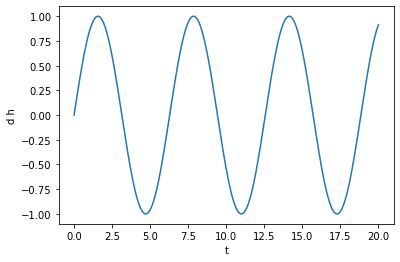

In [4]:
def plot(ser, lab1="d h", lab2="t", *args, **kwargs):
    """Plot Series ser with labels"""
    plt.ylabel(lab1)
    plt.xlabel(lab2)
    plt.plot(ser, *args, **kwargs)
    
plot(gw)

Let's make this more interesting: we square the signal and add Gaussian noise. [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) support directly using all the basic mathematical operations in Python and NumPy, so we can easily square the signal and add another TimeSeries to it.

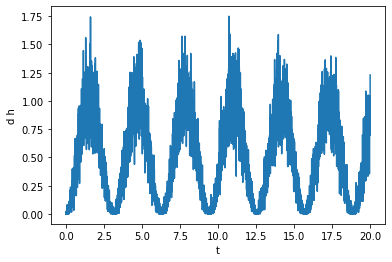

In [5]:
noise = np.random.normal(0, 0.1, len(gw))  # Here we used len() on the TimeSeries
noise_ts = ts.TimeSeries(t, noise)

gw += noise_ts
gw **= 2

plot(gw)

To analyze this signal, first we will smooth it. To do that, we will use the [savgol_smooth_time](../timeseries_ref.html#kuibit.timeseries.TimeSeries.savgol_smooth_time) method, which is a generalized "running average" filter. This method requires length of time over which we want to smooth the data.

In [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) there are always two different methods to do the same task, one with imperative verb (e.g., smooth), and the other with the past tense (e.g., smoothed). The first modifies the data, the second returns a new `TimeSeries` with the operation applied. Here, we will find what smoothing length to use by trial and error, so we will use the second method. 

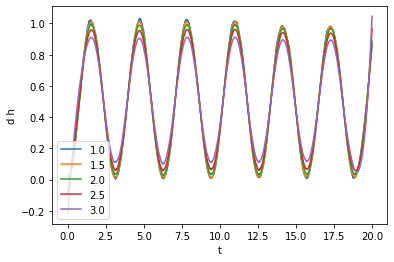

In [6]:
tsmooth = np.linspace(1, 3, 5)

for tsm in tsmooth:
    smoothed = gw.savgol_smoothed_time(tsm)
    plot(smoothed, label=tsm)
plt.legend()

From visual inspection it looks like that ``tsmooth = 1.5`` will work yield a clean series faithful to the original one.

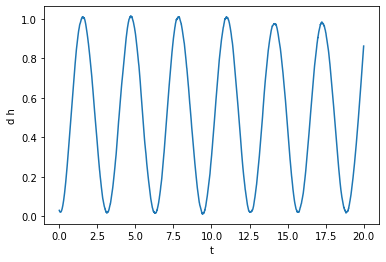

In [7]:
gw.savgol_smooth_time(1.5)
plot(gw)

Next, for fun, we can compute integrals and derivatives. For instance, we can compute what is the integral from 5 to 10.

The integral from 5 to 10 is 2.1870


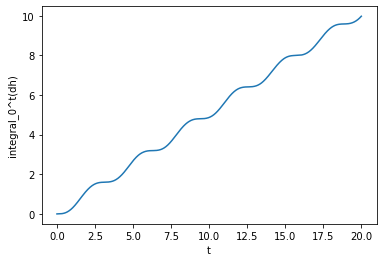

In [8]:
gw_int = gw.integrated()
a = 5
b = 10
print(f"The integral from {a} to {b} is {gw_int(b) - gw_int(a):.4f}")
plot(gw_int, lab1="integral_0^t(dh)")

Here, we showed a very powerful feature of `TimeSeries`: you can call them on a specific time (as we did we ``gw_int(b)``). This is done using splines to interpolate to the points that are not available. Splines can also be used to take derivatives. Alternatively, one can simply take the finite (central) difference. Let's see what's the derivative of ``gw`` using splines and finite difference.

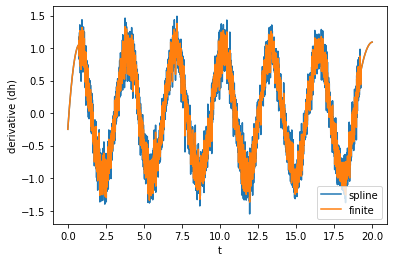

In [9]:
gw_spline_der = gw.spline_differentiated()
gw_numer_der = gw.differentiated()

plot(gw_spline_der, label='spline')
plot(gw_numer_der, lab1="derivative (dh)", label='finite')
plt.legend()

Clearly, derivatives will be noisier than the actual data, so often it is convenient to smooth them out as shown before.

TimeSeries support complex signals. Now, we will create one using `gw` itself. We will copy `gw`, time-shift it, find the common time interval with the original `gw`, and use that as a the imaginary part.

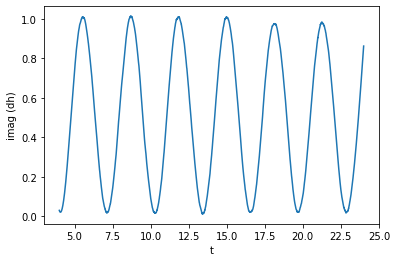

In [10]:
gw_imag = gw.copy()  # It is important to deep copy the object
gw_imag.time_shift(4)

plot(gw_imag, lab1 ="imag (dh)")

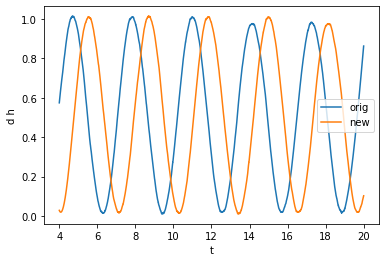

In [11]:
gw, gw_imag = series.sample_common([gw, gw_imag], resample=True)  # Resampling to common times

plot(gw, label="orig")
plot(gw_imag, label="new")
plt.legend()

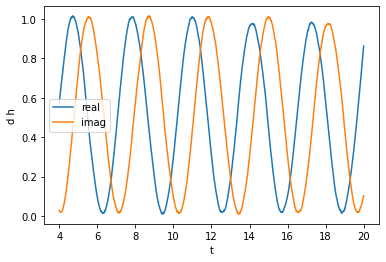

In [12]:
gw_complex = ts.TimeSeries(gw.t, gw.y + 1j * gw_imag.y)

plot(gw_complex.real(), label="real")
plot(gw_complex.imag(), label="imag")
plt.legend()

We can also compute the phase and absolute value. In particular, we will compute the unfolded phase (no wrapping over $2\pi$)

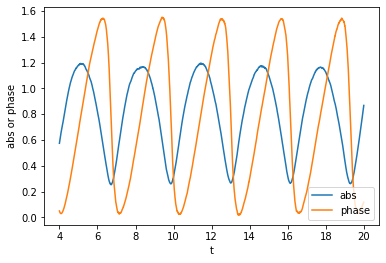

In [13]:
plot(gw_complex.abs(), label='abs')
plot(gw_complex.unfolded_phase(), lab1="abs or phase", label='phase')
plt.legend()

Here, the unfolded phase looks a little bit unusual. This is because we made up the signal.

We can also compute the frequency of the phase, which we can directly smooth.

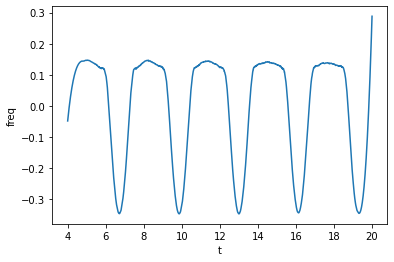

In [14]:
plot(gw_complex.phase_frequency(tsmooth=1.5), lab1="freq")

Next, we will take a Fourier transform. Before, let's pretend that the signal was in geometrized units (as in simulations), and let's make it physical assuming a scale of $M = 1 M_\odot$. For that, use the [unitconv](../unitconv.rst) module. We define a CU object that knows how to convert units.

In [15]:
CU = uc.geom_umass_msun(1) 

# How to convert from geometrized length to physical length?
# Simply multiply times CU.length. Let's check that it is 1.477 km
CU.length  # m

1476.6436994724972

Now we rescale `gw`, assuming that `y` is strain times distance (as usually is). Let's assume a distance of 500 Mpc.

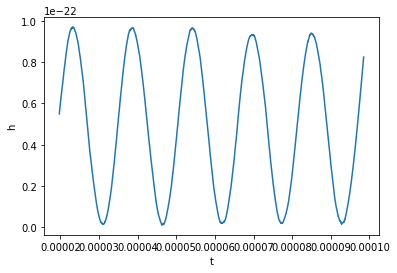

In [16]:
d_Mpc = 500

# inverse = True means from geometrized to physical
gw_physical = gw_complex.time_unit_changed(CU.time, inverse=True)  

gw_physical *= CU.length  # dh -> dh physical
# Now just the strain, since we assume a distance
gw_physical /= (d_Mpc * uc.MEGAPARSEC_SI)

# We have to manually add the redshift
gw_physical.redshifted(luminosity_distance_to_redshift(d_Mpc))

plot(gw_physical.real(), lab1="h")

Okay, now before taking the Fourier transform, we will remove the mean and window our signal. A Tukey window will work.

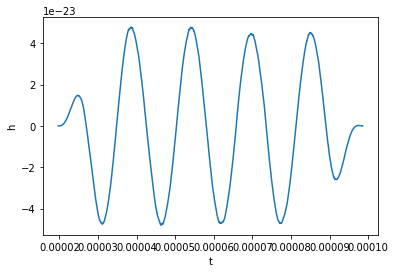

In [17]:
gw_physical.mean_remove()
gw_physical.tukey_window(0.3)
plot(gw_physical.real(), lab1="h")

Finally, we can take the Fourier transform. This is easy to do:

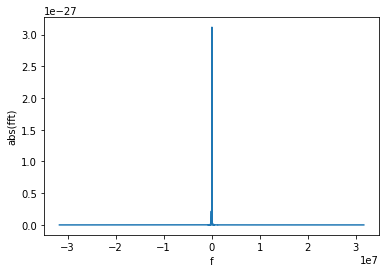

In [18]:
gw_fft = gw_physical.to_FrequencySeries()

# Plotting the amplitude of the Fourier transform
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

The new object is a `FrequencySeries`. It is very similar to a `TimeSeries` and it shares several properties, methods, and features. 

Let's restrict to only positive frequencies close to zero.

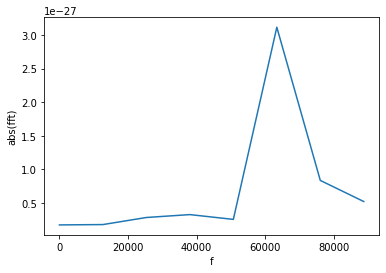

In [19]:
gw_fft.crop(0, 1e5)
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

We can find the frequency of that peak! For this, we find all the peaks with amplitude larger than 1e-27.

Frequency: 64147.78


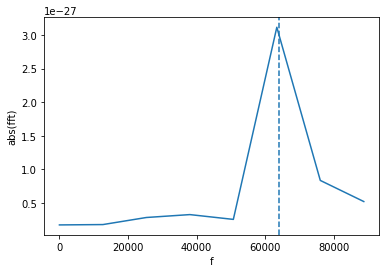

In [20]:
f_peak = gw_fft.peaks_frequencies(1e-27)[0]

print(f"Frequency: {f_peak:.2f}")
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")
plt.axvline(f_peak, ls = 'dashed')

The line is not on the maximum because we use a quadratic interpolation to find a more accurate location of the peak.

Sometimes, it is useful to ignore some data (or example, when we know that the data is invalid). `Series` objects support _masks_ to mark the points we want to ignore. Most functions work transparently with masks: for example, if you ask for the mean of a `Series`, the masked point will be ignored. Other functions do not support masks (most notably, splines). In that case, it is best to completely remove the masked points and work with clean data.

In [21]:
# Let's mask all the point in the spectrum with value larger than 1e-27

spectrum = gw_fft.abs()

print(f"Maximum without mask {spectrum.max():.3e}")

# Apply mask
spectrum.mask_greater(1e-27)

print(f"Maximum with mask {spectrum.max():.3e}")

print(f"Length with mask {len(spectrum)}")

# Remove points
spectrum.mask_remove()

print(f"Length after having removed the masked points {len(spectrum)}")

Maximum without mask 3.116e-27
Maximum with mask 8.337e-28
Length with mask 8
Length after having removed the masked points 7
